## Portfolio Allocation (Part 1): Using Monte Carlo Simulation 

*Background Note: This portfolio analysis was part of one of my larger projects which I undertook in the summer of 2014. At the time I carried out the project in R. The analysis has been reproduced in python3.* 

Market uncertainty and price volatility is a fact that financial managers deal with everyday. How we analyze and internalize uncertainty in our decision making process significantly impacts the outcome of investments.

One of the most widely used methods in analyzing uncertainty is Monte Carlo simulation (MCS). In MCS, a stochastic sampling method is used to simulate random variables and its impact on the asset values is assessed. (Refer https://en.wikipedia.org/wiki/Monte_Carlo_methods_in_finance for more information.)

For this illustration, the the following companies from the Auto Index of the National Stock Exchange (NSE) are selected: Ashok Leyland, Bosch India, Cummins India, Eicher Motors, Mahindra & Mahindra, Maruti Suzuki Motors, MRF Tyres, Tata Motors, TVS Motors (refer https://www.nseindia.com/).

In [2]:
# Let's start by importing the commonly used libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We've selected auto stocks from the NSE's autombile index which comprises 9 companies. These are:
* Ashok Leyland
* Bosch India
* Cummins India
* Eicher Motors
* Mahindra & Mahindra
* Maruti Suzuki Motors
* MRF Tyres
* Tata Motors
* TVS Motors

The companies listed have quite a broad portfolio of products in the automotive sector. E.g. Cummins is a major supplier of diesel engines and standalone power generators for powering behind-the-fence facilities. MRF a major manufacturer of tyres for all types of vehicles from small two-wheelers to large earth movers. Tata Motors manufactures all types of vehicles from passenger cars to commercial heavy cargo vehicles (HCVs), and TVS Motors mainly produces vehicles for the two wheeler market, and is active in the light cargo vehicle (LCV) segment. Bosch India is an OEM of automotive components for most of the industry.

In [3]:
#Once the data format and columns have been visually examined, read-in the data from auto companies file. 
#In the "read_csv" command, let's set the 'Date' as index column and slice out the data from Jan 1, 2009 to Dec 31, 2013

ashok = pd.read_csv('01Ashok_Leyland.csv', index_col='Date', parse_dates=True)
ashok = ashok.loc['2009-1-1':'2013-12-31']
bosch = pd.read_csv('01Bosch.csv', index_col='Date', parse_dates=True)
bosch = bosch.loc['2009-1-1':'2013-12-31']
cummins = pd.read_csv('01CUMMINSIND_data.csv', index_col='Date', parse_dates=True)
cummins = cummins.loc['2009-1-1':'2013-12-31']
eicher = pd.read_csv('01EICHERMOT_data.csv', index_col='Date', parse_dates=True)
eicher = eicher.loc['2009-1-1':'2013-12-31']
mm = pd.read_csv('01M&M_data.csv', index_col='Date', parse_dates=True)
mm = mm.loc['2009-1-1':'2013-12-31']
maruti = pd.read_csv('01MARUTI_data.csv', index_col='Date', parse_dates=True)
maruti = maruti.loc['2009-1-1':'2013-12-31']
mrf = pd.read_csv('01MRF_data.csv', index_col='Date', parse_dates=True)
mrf = mrf.loc['2009-1-1':'2013-12-31']
tata = pd.read_csv('01TATAMOTORS_data.csv', index_col='Date', parse_dates=True)
tata = tata.loc['2009-1-1':'2013-12-31']
tvs = pd.read_csv('01TVSMOTOR_data.csv', index_col='Date', parse_dates=True)
tvs = tvs.loc['2009-1-1':'2013-12-31']

In [4]:
ashok = ashok['adj_close']
bosch = bosch['adj_close']
cummins = cummins['adj_close']
eicher = eicher['adj_close']
mm = mm['adj_close']
maruti = maruti['adj_close']
mrf = mrf['adj_close']
tata = tata['adj_close']
tvs = tvs['adj_close']

In [5]:
auto_stocks_pf = pd.concat([ashok, bosch, cummins, eicher, mm, maruti, mrf, tata, tvs], axis=1)

In [6]:
#Set column names for each company
auto_stocks_pf.columns = ['ashok', 'bosch', 'cummins', 'eicher', 'mm', 'maruti', 'mrf', 'tata', 'tvs']

In [7]:
#Let's examine the data format
auto_stocks_pf.head()

,ashok,bosch,cummins,eicher,mm,maruti,mrf,tata,tvs
Date,,,,,,,,,
2009-01-02,5.985055,2922.206055,127.693787,221.896881,55.967052,516.076172,1982.361694,25.930441,9.790543
2009-01-05,6.040645,2925.291992,128.365601,221.804428,57.450584,528.067932,1997.651611,26.283930,9.749146
2009-01-06,6.022114,2897.469238,124.838005,219.447266,61.726650,532.191589,1972.799561,27.462313,9.666351
2009-01-07,5.781230,2887.640625,114.871361,207.476578,58.682014,535.746460,1834.170044,25.650637,8.652109
2009-01-09,5.632993,2869.978516,113.695473,202.438736,60.534004,555.369507,1777.427124,24.413374,7.927649


In [8]:
auto_stocks_pf.tail()

,ashok,bosch,cummins,eicher,mm,maruti,mrf,tata,tvs
Date,,,,,,,,,
2013-12-24,16.075584,9644.137695,432.052460,4873.849121,446.147156,1740.812988,19477.583984,366.960632,63.099712
2013-12-26,16.414530,10394.557620,435.295715,4875.122559,444.920105,1745.484253,18950.003906,364.597809,62.228718
2013-12-27,16.027163,10210.483400,435.481079,4890.600098,447.837311,1727.431763,19283.541016,366.222137,66.486984
2013-12-30,16.608210,10038.765630,442.430969,4873.163086,439.155151,1729.524048,19136.494141,369.078644,76.503571
2013-12-31,16.705050,9873.717773,444.006287,4874.192383,437.210358,1716.581055,19239.621094,370.654175,73.503426


In [9]:
#Let's check for missing values
auto_stocks_pf.isnull().sum()

ashok      0
bosch      0
cummins    0
eicher     0
mm         0
maruti     0
mrf        0
tata       0
tvs        0
dtype: int64

In [10]:
#Let's quickly examine the data to see if there are any unusual values (negatives)
auto_stocks_pf.describe()

,ashok,bosch,cummins,eicher,mm,maruti,mrf,tata,tvs
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,20.683668,6432.340788,350.974528,1593.757739,290.610024,1237.226602,8365.029057,192.296590,38.960670
std,6.057837,1981.168427,106.890910,1108.150067,98.909161,236.688874,3756.200591,91.846904,14.638024
min,5.095636,2749.523682,86.794189,175.308228,51.322517,488.395294,1496.721802,19.265594,6.230346
25%,17.306665,4679.849243,296.701302,648.971389,223.695549,1116.871948,6150.757324,123.353968,30.336604
50%,21.777386,6683.727050,385.135056,1280.572449,300.760865,1264.831116,7256.472656,198.516251,37.917553
75%,24.208795,8476.083740,430.849472,2206.676941,365.413475,1398.871125,10562.472657,265.246544,48.041582
max,33.414341,10394.557620,488.678802,5032.784180,452.180267,1761.103638,19769.886719,393.794830,76.503571


In [11]:
#Next step is to compute mean daily returns
mean_drets = auto_stocks_pf.pct_change(1).mean()
mean_drets

ashok      0.001184
bosch      0.001072
cummins    0.001200
eicher     0.002766
mm         0.001939
maruti     0.001181
mrf        0.002114
tata       0.002598
tvs        0.002130
dtype: float64

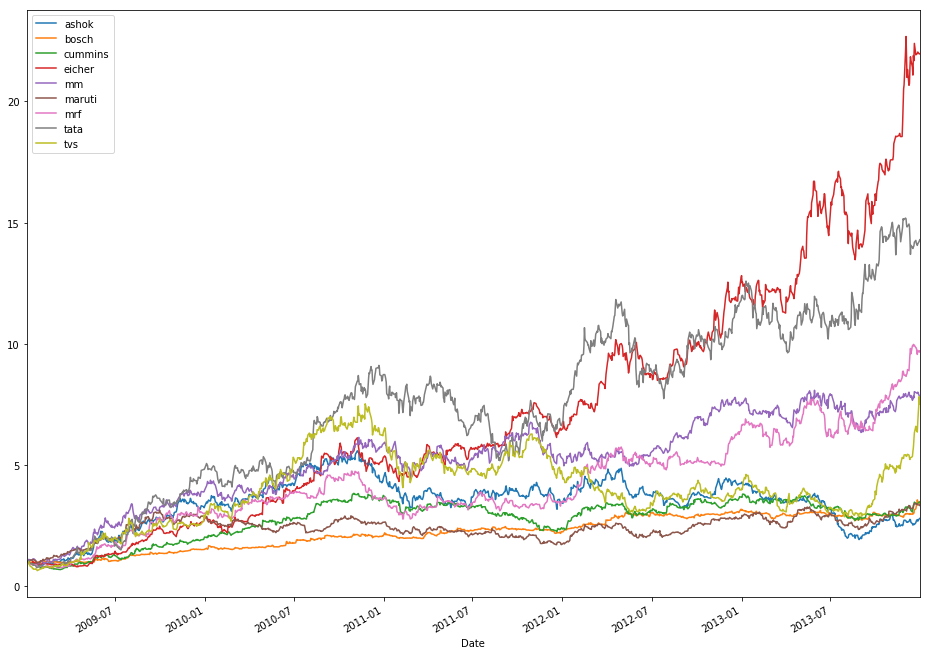

In [12]:
((1+(auto_stocks_pf.pct_change(1))).cumprod()).plot(kind='line', figsize=(16,12))

In [13]:
((auto_stocks_pf.pct_change(1)).corr())

,ashok,bosch,cummins,eicher,mm,maruti,mrf,tata,tvs
ashok,1.000000,0.156392,0.306351,0.229677,0.407152,0.361097,0.281972,0.453030,0.365811
bosch,0.156392,1.000000,0.188613,0.123518,0.156981,0.146830,0.196917,0.186644,0.195337
cummins,0.306351,0.188613,1.000000,0.223470,0.254598,0.215779,0.217238,0.260907,0.256345
eicher,0.229677,0.123518,0.223470,1.000000,0.232164,0.188111,0.201535,0.213450,0.186478
mm,0.407152,0.156981,0.254598,0.232164,1.000000,0.432468,0.296738,0.448954,0.339260
maruti,0.361097,0.146830,0.215779,0.188111,0.432468,1.000000,0.227685,0.372119,0.305222
mrf,0.281972,0.196917,0.217238,0.201535,0.296738,0.227685,1.000000,0.298889,0.251923
tata,0.453030,0.186644,0.260907,0.213450,0.448954,0.372119,0.298889,1.000000,0.342528
tvs,0.365811,0.195337,0.256345,0.186478,0.339260,0.305222,0.251923,0.342528,1.000000


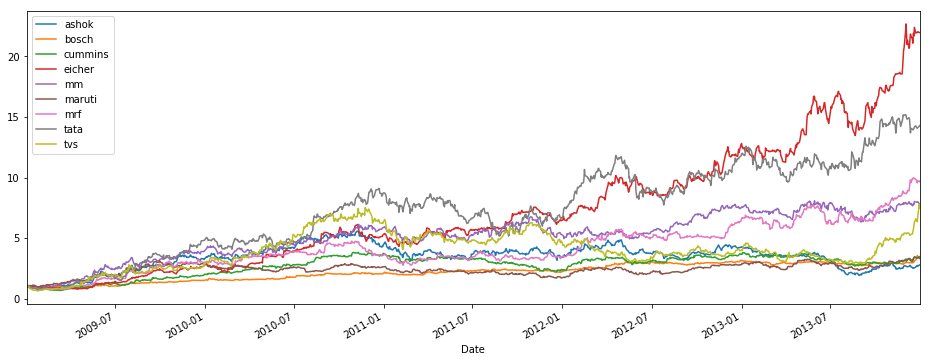

In [14]:
#Computing daily normed returns and plotting the returns
auto_stock_normed = auto_stocks_pf/auto_stocks_pf.iloc[0]
auto_stock_normed.plot(figsize=(16, 6))

In [15]:
#Let's create a dataframe of daily stock returns 
auto_stock_drets = auto_stocks_pf.pct_change(1)
auto_stock_drets.head()

,ashok,bosch,cummins,eicher,mm,maruti,mrf,tata,tvs
Date,,,,,,,,,
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.009288,0.001056,0.005261,-0.000417,0.026507,0.023236,0.007713,0.013632,-0.004228
2009-01-06,-0.003068,-0.009511,-0.027481,-0.010627,0.074430,0.007809,-0.012441,0.044833,-0.008493
2009-01-07,-0.040000,-0.003392,-0.079837,-0.054549,-0.049324,0.006680,-0.070270,-0.065970,-0.104925
2009-01-09,-0.025641,-0.006116,-0.010237,-0.024281,0.031560,0.036627,-0.030937,-0.048235,-0.083732


In [16]:
#Another dataframe for storing daily log returns 
auto_log_ret = np.log(auto_stocks_pf/auto_stocks_pf.shift(1))
auto_log_ret.head()

,ashok,bosch,cummins,eicher,mm,maruti,mrf,tata,tvs
Date,,,,,,,,,
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.009245,0.001055,0.005247,-0.000417,0.026162,0.022971,0.007683,0.013540,-0.004237
2009-01-06,-0.003072,-0.009557,-0.027866,-0.010684,0.071791,0.007779,-0.012519,0.043857,-0.008529
2009-01-07,-0.040822,-0.003398,-0.083204,-0.056094,-0.050582,0.006657,-0.072862,-0.068246,-0.110848
2009-01-09,-0.025976,-0.006135,-0.010289,-0.024581,0.031072,0.035973,-0.031425,-0.049437,-0.087447


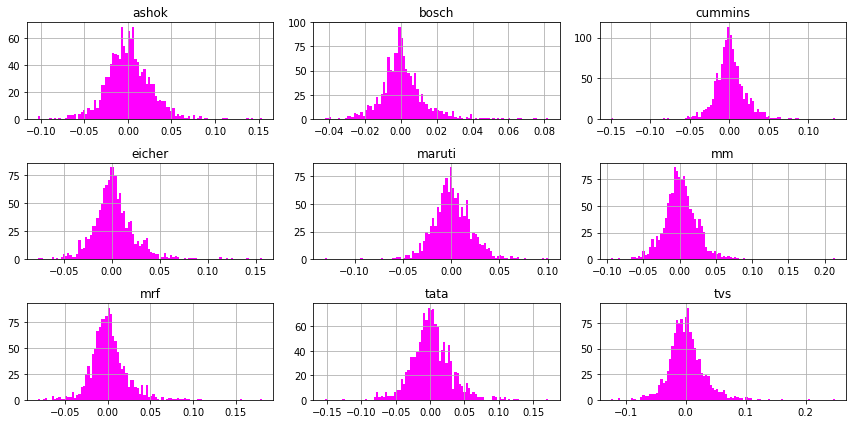

In [17]:
#Let's visually examine the distribution of daily log returns. 
#Tightly distributed values indicate lower volatility, and by extension, possibly a lower beta value of stock.

auto_log_ret.hist(bins=100,figsize=(12,6), color='magenta');
plt.tight_layout()

In [18]:
#For annualized log returns, multiply by 252 which is the average number of trading days in a year
auto_log_ret.mean()*252

ashok      0.210125
bosch      0.249244
cummins    0.255112
eicher     0.632456
mm         0.420816
maruti     0.246030
mrf        0.465245
tata       0.544503
tvs        0.412681
dtype: float64

In [19]:
#Let's compute covariance of log returns each stock, which will help us finetune stock selection and allocation percentage
auto_log_ret.cov()*252

,ashok,bosch,cummins,eicher,mm,maruti,mrf,tata,tvs
ashok,0.175425,0.013467,0.039094,0.034420,0.061953,0.048099,0.044125,0.088852,0.076128
bosch,0.013467,0.041382,0.011743,0.009037,0.011702,0.009605,0.014833,0.017589,0.020089
cummins,0.039094,0.011743,0.094293,0.023808,0.027833,0.020798,0.024652,0.036859,0.039216
eicher,0.034420,0.009037,0.023808,0.125965,0.030017,0.021260,0.026567,0.035268,0.033434
mm,0.061953,0.011702,0.027833,0.030017,0.133845,0.050360,0.040138,0.076287,0.062161
maruti,0.048099,0.009605,0.020798,0.021260,0.050360,0.102704,0.026955,0.055298,0.048451
mrf,0.044125,0.014833,0.024652,0.026567,0.040138,0.026955,0.132796,0.051768,0.047554
tata,0.088852,0.017589,0.036859,0.035268,0.076287,0.055298,0.051768,0.217952,0.080206
tvs,0.076128,0.020089,0.039216,0.033434,0.062161,0.048451,0.047554,0.080206,0.244513


#### Standalone Run for Some Random Allocation

Description of important steps:

* Let's create an array of random weights. Note that the number of weights needs to be equal to the number of stocks in the portfolio.

* The sum of weights generated using numpy can exceed 1.0. And this needs to be rectified, and the weights need to rebalanced to 1.0

* The expected returns calculation is self-explanatory.

* The estimated volatility is given by (1) the dot product of annalized covariance of log returns and weights. And the square root of ((1)dot.product of (weights)T

* Sharpe Ratio, SR, is given by SR = (expected returns / expected volatility)

In [20]:
np.random.seed(52)

#Auto Stock columns
print('Auto Stocks')
print('auto_stocks_pf.columns')
print ('\n\n')

#Create random weights
print('Creating Random Weights')
weights = np.array(np.random.random(9))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(auto_log_ret.mean() * weights)*252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(auto_log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Auto Stocks
auto_stocks_pf.columns



Creating Random Weights
[ 0.82311034  0.02611798  0.21077064  0.61842177  0.09828447  0.62013131
  0.05389022  0.96065406  0.98042937]


Rebalance to sum to 1.0
[ 0.18741938  0.00594697  0.04799175  0.1408125   0.02237903  0.14120176
  0.01227062  0.21873761  0.22324038]


Expected Portfolio Return
0.403261211366992


Expected Volatility
0.278557406824


Sharpe Ratio
1.44767721658


#### Let's run a Monte Carlo Simulation for finding the optimal portfolio allocation with the highest Sharpe Ratio

In [44]:
np.random.seed(52)
num_ports = 25000

all_weights = np.zeros((num_ports,len(auto_stocks_pf.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(9))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((auto_log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(auto_log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [45]:
sharpe_arr.max()

2.174554365721554

In [46]:
sharpe_arr.argmax()

14142

We see that:
1. The highest the simulation finds the highest SR to be ~2.17, and 
2. That the weight allocations that yield the highest SR can be found at index location '14142' 

In [47]:
all_weights[14142,:]

array([ 0.02460862,  0.33320682,  0.03822293,  0.27759752,  0.02077243,
        0.00991396,  0.24470679,  0.03581674,  0.01515419])

For obtaining the highest listed SR of 2.23 the simulation suggests the following allocations across the auto stocks:

* Ashok = 2.46%
* Bosch = 33.32%
* Cummins = 3.82%
* Eicher = 27.76%
* Mahindra = 2.10%
* Maruti = 1.00%
* MRF = 24.50%
* Tata = 3.58%
* TVS = 1.52%

Sum of allocations = 100% (adjusted to rounding errors)

In [48]:
#Let's create new variables for plots
max_sr_ret = ret_arr[14142]
max_sr_vol = vol_arr[14142]

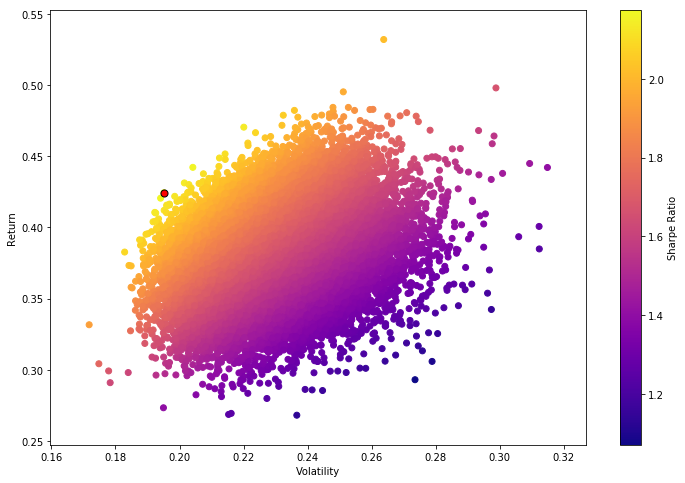

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

(The above results here are for illustration of use of MCS only. In a live project, there will be a lot more constraints in place. For instance, there may be a limit on investing a certain amount in one particular stock; the returns & allocations must be adjusted for forward looking research, among others.)

While using MCS in asset pricing and portfolio valuation has its benefits, it's computationally expensive. There are better methods available for portfolio allocation and one such method is SciPy's Optimization function. 